### 영상의 이진화 
 - 영상의 픽셀을 0 또는 255로 만드는 영상 
   - 배경/객체 , 관심영역/비관심영역
  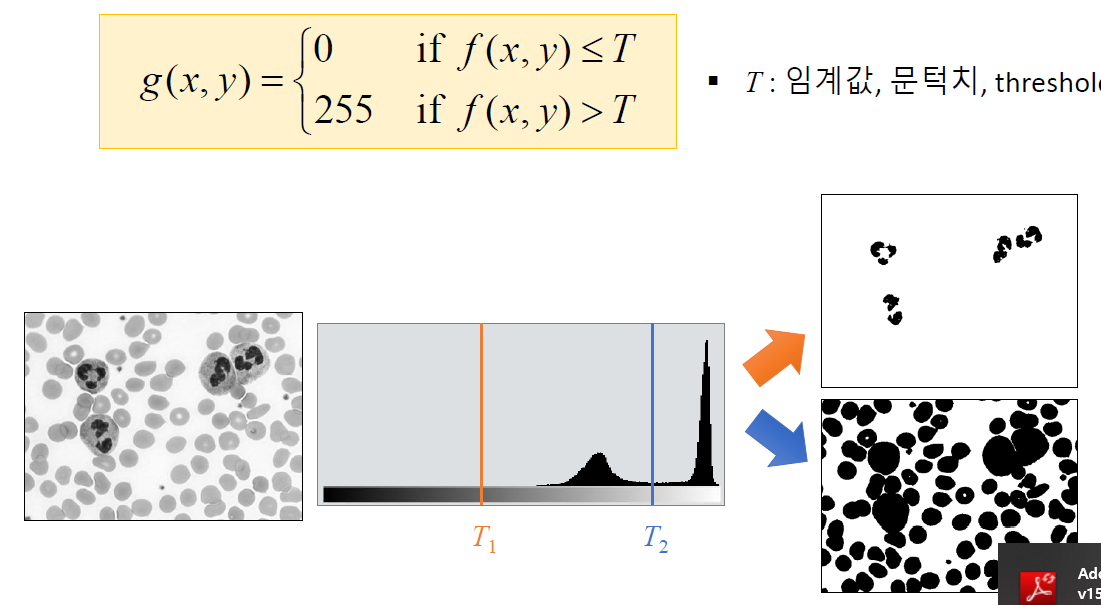

**``` cv2.threshold(src, thresh, maxval, type, dst=None) -> retval, dst ```**
 - src: 입력영상 
 - thresh : 사용자 지정 임계값 
 - maxval : cv2.THRESH_BINARY or cv2.THRESH_BINARY_INV, 최댓값은 보통 255
 - type : cv2.THRESH_로 시작하는 flag
 - retval : 사용된 임계값 
 - dst : 출력영상
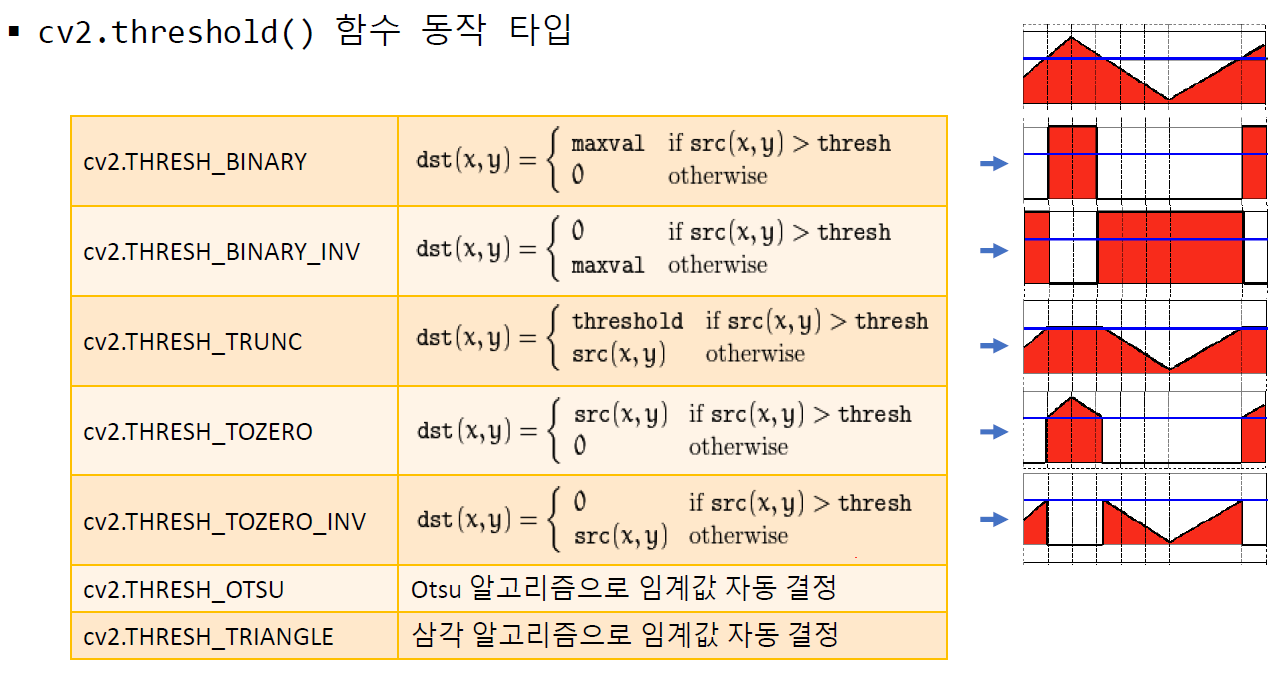

In [2]:
import sys
import numpy as np
import cv2


src = cv2.imread('.\\ch07\\cells.png', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

_, dst1 = cv2.threshold(src, 100, 255, cv2.THRESH_BINARY)
_, dst2 = cv2.threshold(src, 210, 255, cv2.THRESH_BINARY)

cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()


### trackbar 기능 이용해보기 
def on_threshold(pos):
    _, dst = cv2.threshold(src, pos, 255, cv2.THRESH_BINARY)
    cv2.imshow('dst', dst)


cv2.imshow('src', src)
cv2.namedWindow('dst')
cv2.createTrackbar('Threshold', 'dst', 0, 255, on_threshold)
cv2.setTrackbarPos('Threshold', 'dst', 128)

cv2.waitKey()
cv2.destroyAllWindows()


### 임계값 자동 결정 1 . - ostu method
 - ostu는 bimodal histogram에서 동작 ( histogram에서 peak가 2개로 나타나는 영상) 
 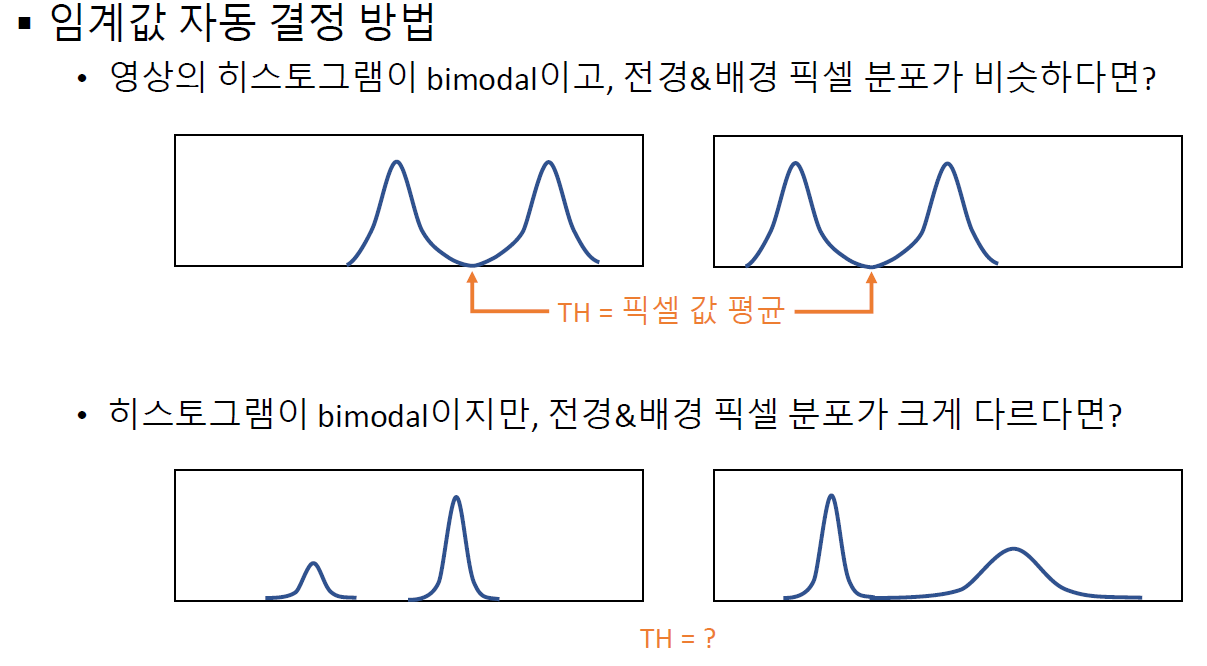
 
 - 두 픽셀 분포 그룹의 분산이 최소가 되는 T 선택
  - 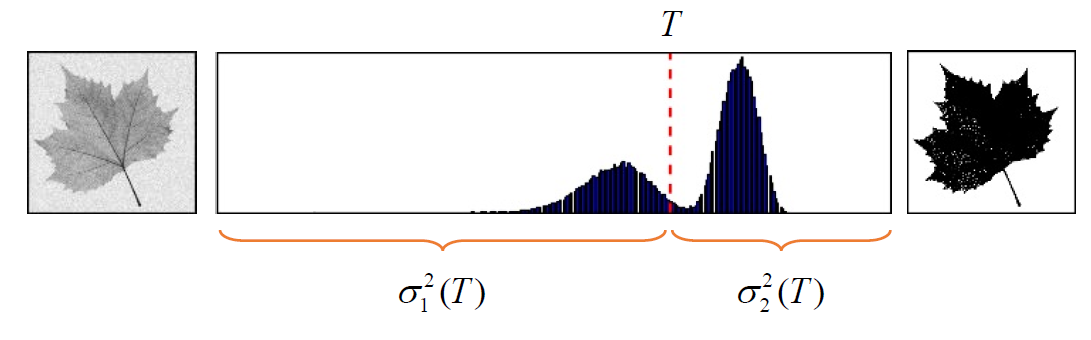
 
 - 이진화 방법
  - 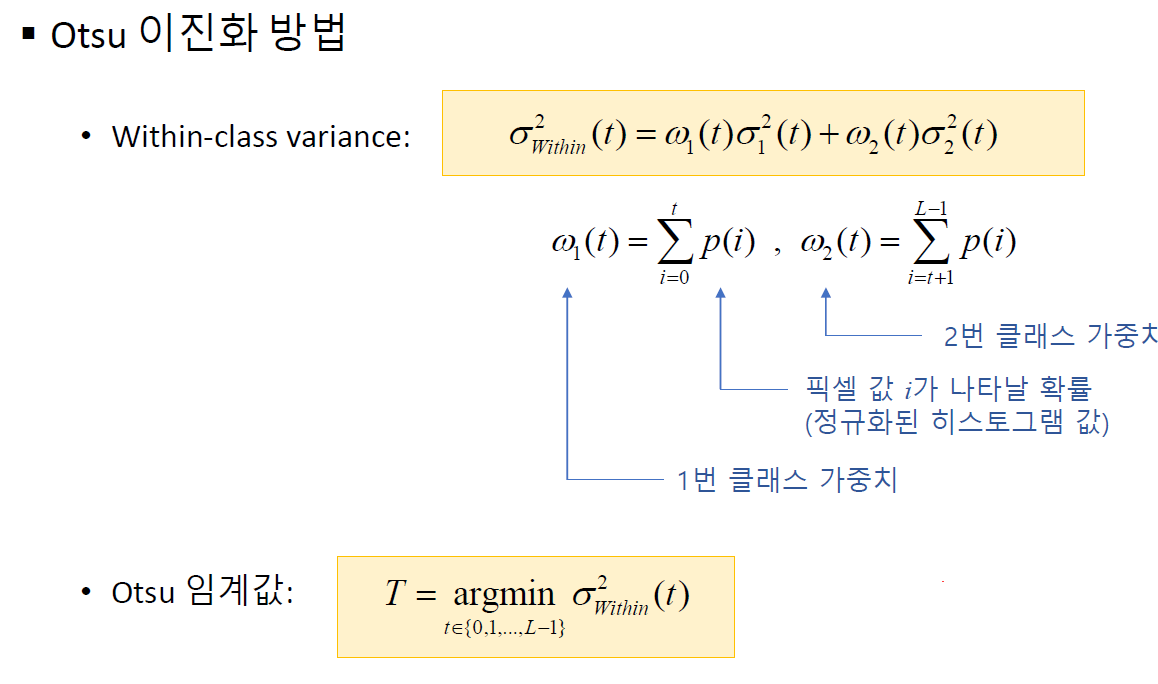
  - 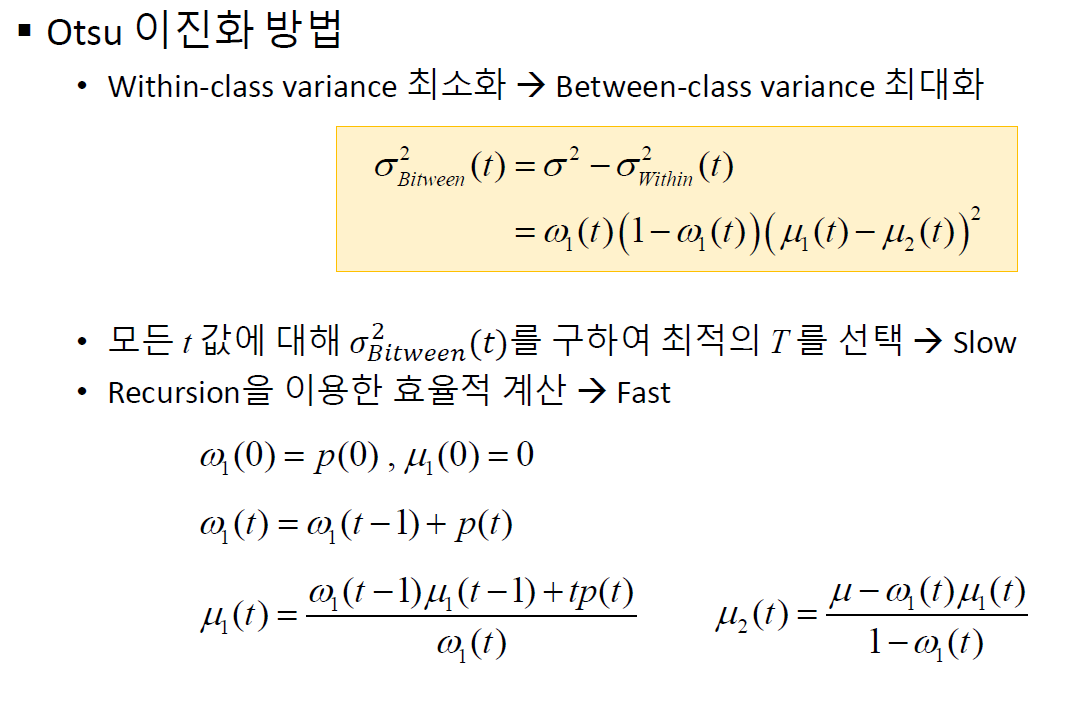 

 - https://en.wikipedia.org/wiki/Otsu%27s_method

In [3]:
import sys
import numpy as np
import cv2


src = cv2.imread('.\\ch07\\rice.png', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

th, dst = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print("otsu's threshold:", th)  # 131

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()


otsu's threshold: 131.0


### 임계값 자동 결정 2 . local binarization
 - 조명이 불균일하게 찍힌 영향을 받은 이미지에서 ostu 대신 사용할 수 있는 최적화 알고리즘
 - 

In [6]:
import sys
import numpy as np
import cv2

### trackbar 기능 이용해보기 
def on_threshold(pos):
    _, dst = cv2.threshold(src, pos, 255, cv2.THRESH_BINARY)
    cv2.imshow('dst', dst)

src = cv2.imread('.\\ch07\\sudoku.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()




cv2.imshow('src', src)
cv2.namedWindow('dst')
cv2.createTrackbar('Threshold', 'dst', 0, 255, on_threshold)
cv2.setTrackbarPos('Threshold', 'dst', 128)

cv2.waitKey()
cv2.destroyAllWindows()

|th 128| th 52|
|--|--|
|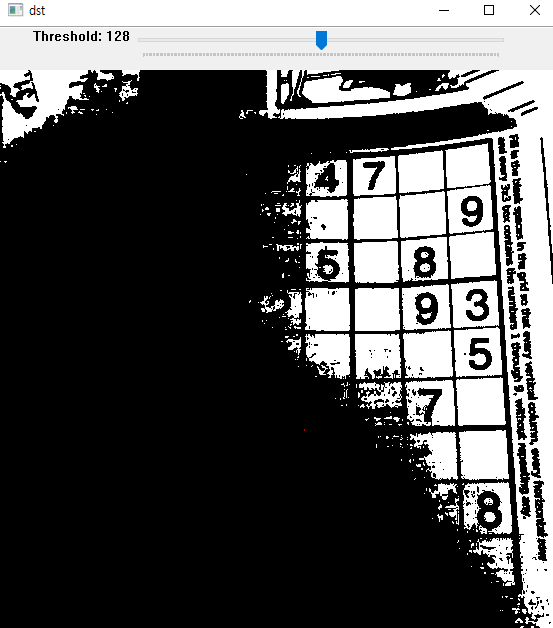|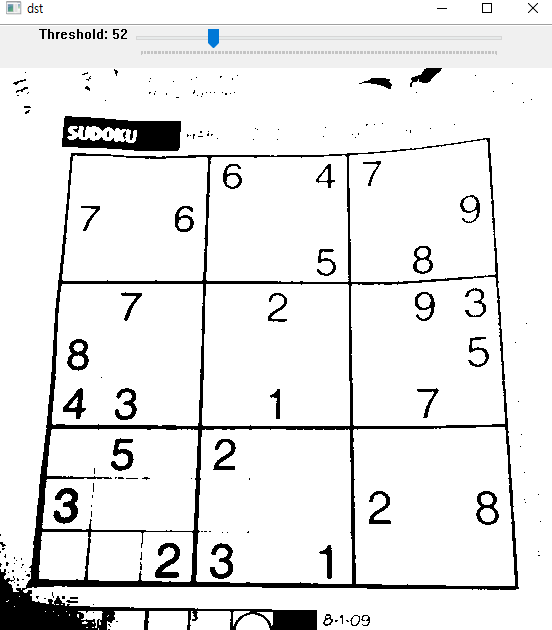|

 - th 128은 왼쪽 하단이 안보인다 
 - th 52는 오른쪽 하단이 보이지만 우상단에서 격자가 뭉개진다

In [11]:
import sys
import numpy as np
import cv2


# 입력 영상 불러오기
src = cv2.imread('.\\ch07\\rice.png', cv2.IMREAD_GRAYSCALE)
src = cv2.imread('.\\ch07\\sudoku.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

# 전역 이진화 by Otsu's method
_, dst1 = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# 지역 이진화 by Otsu's method
dst2 = np.zeros(src.shape, np.uint8)

bw = src.shape[1] // 4
bh = src.shape[0] // 4

for y in range(4):
    for x in range(4):
        src_ = src[y*bh:(y+1)*bh, x*bw:(x+1)*bw]
        dst_ = dst2[y*bh:(y+1)*bh, x*bw:(x+1)*bw]
        cv2.threshold(src_, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU, dst_)

# 결과 출력
cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()


### Opencv adpative binarization
**``` cv2.apdativeThreshold(src, maxValue, adaptiveMethod,thresholdType,blocksize,C,dst=None) ->dst ```**
 - src : 입력영상(grayscale)
 - maxValue : 임계값 함수 최댓값 (보통 255)
 - adpativeMethod : 블록 평균 계산 방법 지정 
   - cv2.ADAPTIVE_THRESH_MEAN_C 는 산술평균
   - cv2.ADAPTIVE_THRESH_GAUSSIAN_C 는 가중평균
 - thresholdType: cv2.THRESH_BINARY 또는 cv2.THRESH_BINARY_INV 지정
 - blockSize : 블록 크기 (3이상 홀수)
 - C : 블록 내 평균값 또는 가중 평균값ㅇ서 뺄 값 

In [12]:
import sys
import numpy as np
import cv2


src = cv2.imread('.\\ch07\\sudoku.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()


def on_trackbar(pos):
    bsize = pos
    if bsize % 2 == 0:
        bsize = bsize - 1
    if bsize < 3:
        bsize = 3

    dst = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, bsize, 5)

    cv2.imshow('dst', dst)


cv2.imshow('src', src)
cv2.namedWindow('dst')
cv2.createTrackbar('Block Size', 'dst', 0, 200, on_trackbar)
cv2.setTrackbarPos('Block Size', 'dst', 11)

cv2.waitKey()
cv2.destroyAllWindows()


### Morphology (형태학) 
 Morphology
 - 영상을 형태학적인 측면에서 다루는 기법
 - pre/post processing
 - 수학적 morphology
 Structuring element
 
|erosion|dilation|
|--|--|
|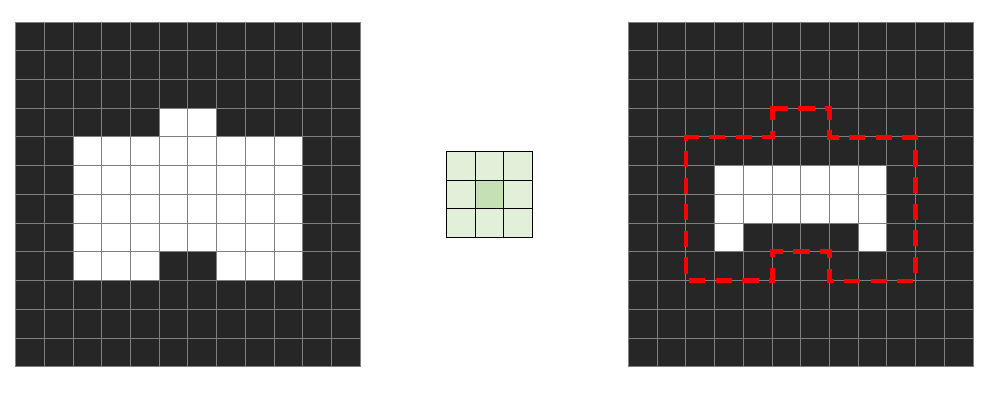|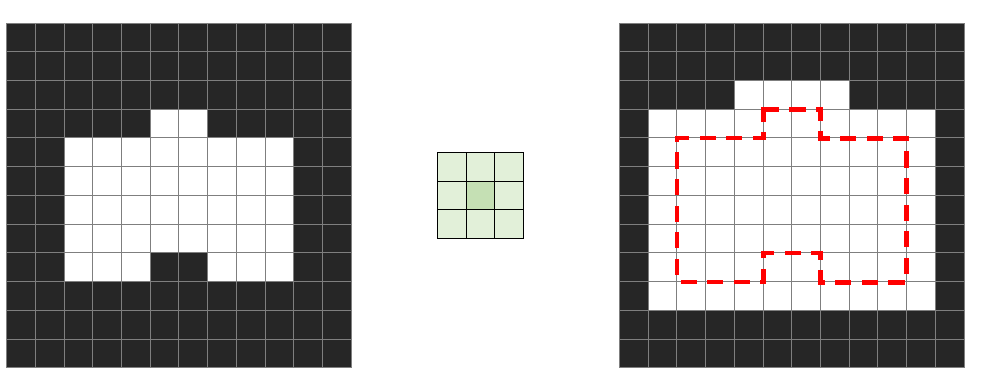|
|window sliding 하면서 커널이 완전히 겹치는 구간에서 anchor에 marking 하는 방식|커널이 한 픽셀이라도 만나는 구간에서 anchor에 marking 하는 방식|
|객체영역이 점점 줄어들지만 작은 크기의 (잡음)제거 효과 | 객체영역이 점점 커지지만 객체 내부 hole을 메꿀 수 있음|


**``` cv2.erode(src, kernel,dst=None,anchor=None,iterations=None,borderType=None,borderValue=None) ->dst ```** 

**``` cv2.dilate(src, kernel,dst=None,anchor=None,iterations=None,borderType=None,borderValue=None) ->dst ```**

 - src : 입력영상
 - kernel : 구조요소.getStructuingElement()에의해생성. None시 3*3 사각형
   - cv2.getStructuringElement(shape,ksize,anchor=None) -> retval
     - shape: 구조요소 모양을 나타내는 Flag (cv2.MORPH_RECT,cv2.MORPH_CROSS, cv2.MORPH_ELLIPSE)
     - ksize: 구조요소크기 (w,h) 
     - anchor : 
     - retval : cv2.CV_8UC1 타입행렬
 - anchor :고정점 위치. 기본값 (-1,-1)시 중앙점
 - iterations :반복 횟수
 - borderType : 가장자리 픽셀 확장 방식. 기본값은 cv2.BORDER_CONSTANT.
 - borderValue: cv2.BORDER_CONSTANT인 경우 확장된 가장자리 픽셀을 채울 값 
 

In [13]:
import sys
import numpy as np
import cv2


src = cv2.imread('.\\ch07\\circuit.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

se = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 3))
dst1 = cv2.erode(src, se)

dst2 = cv2.dilate(src, None)

cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()


Morphology

|열기(opening)|닫기(closing)|
|--|--|
|Erosion->Dilation|Dilation->Erosion|

**``` cv2.morphologyEx(src,op,dst=None, iterations=None,borderType=None,borderValue=None) ->dst```**
 - src : 입력 영상 
 - op :  모폴로지 연산 Flag
   - |||
     |--|--|
     |cv2.MORPH_ERODE|침식|
     |cv2.MORPH_DILATE|팽창|
     |cv2.MORPH_OPEN|열기|
     |cv2.MORPH_CLOSE|닫기|
     |cv2.MORPH_GRADIENT|팽창-침식|
 - borderType : 가장자리 픽셀 확장 방식. 기본값은 cv2.BORDER_CONSTANT.
 - borderValue: cv2.BORDER_CONSTANT인 경우 확장된 가장자리 픽셀을 채울 값 

In [15]:
import sys
import numpy as np
import cv2


src = cv2.imread('.\\ch07\\rice.png', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

# src 영상에 지역 이진화 수행 (local_th.py 참고)
dst1 = np.zeros(src.shape, np.uint8)

bw = src.shape[1] // 4
bh = src.shape[0] // 4

for y in range(4):
    for x in range(4):
        src_ = src[y*bh:(y+1)*bh, x*bw:(x+1)*bw]
        dst_ = dst1[y*bh:(y+1)*bh, x*bw:(x+1)*bw]
        cv2.threshold(src_, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU, dst_)

cnt1, _ = cv2.connectedComponents(dst1) # 흰 객체의 숫자 count 해주는 API
print('cnt1:', cnt1)

dst2 = cv2.morphologyEx(dst1, cv2.MORPH_OPEN, None)
#27행을 29,30으로 manual로 수행 가능
#dst2 = cv2.erode(dst1, None)
#dst2 = cv2.dilate(dst2, None)

cnt2, _ = cv2.connectedComponents(dst2)
print('cnt2:', cnt2)

cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()


cnt1: 113
cnt2: 99


## 객체 단위 분석
 - 객체와 배경을 분리하고 객체에 대해 분석하는 것 
 - 1) Labeling
 - 2) contour Tracking

### Labeling
 - 동일 객체에 속한 모든 픽셀에 고유한 번호를 매기는 작업
 - 이진 영상에서 수행 
 - 픽셀 연결관계 (4-neighbor : 상하좌우 / 8-neightbor : 4+대각선)
 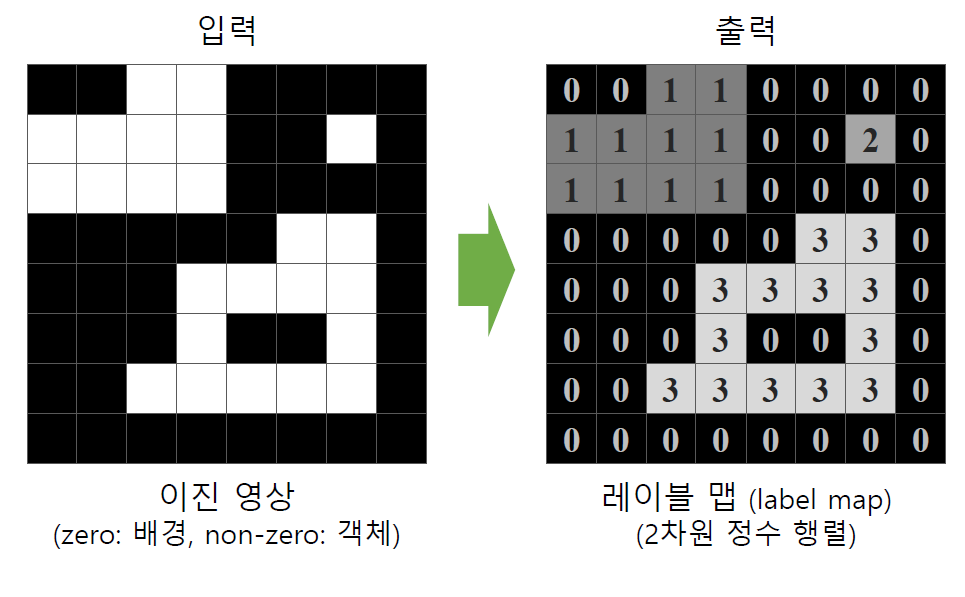

**``` cv2.connectedComponents(image, labels=None, connectivity=None, ltype=None ) -> retval ```**
 - image: 8비트 1채널 영상
 - labels: 레이블 맵 행렬 . 입력 영상과 같은 크기 . numpy.ndarray 
 - connectivity: 4 또는 8. 기본값은 8.
 - ltype : labels타입. cv2.CV_32S . cv2.CV_32S . cv2.CV_32S . cv2.CV_32S 또는 cv2.CV_16S. cv2.CV_16S. cv2.CV_16S. 기본값은 cv2.CV_32S. cv2.CV_32S. cv2.CV_32S.
 - retval :객체 개수 . N . N을 반환하면 [0, N -1] 의 레이블이 존재 하며 , 0은 배경을 의미. (실제 흰색 객체 개수는 N-1개)
 
**``` cv2.connectedComponents(image, labels=None, stats=None, controids=None, connectivity=None, ltype=None ) -> retval, labels,stats,centroids ```**
 - image: 8비트 1채널 영상
 - labels: 레이블 맵 행렬 . 입력 영상과 같은 크기 . numpy.ndarray 
 - stats : 각 객체의 바운딩 박스, 픽셀 개수 정보를 담은 행렬 numpy.ndarray. shape= (N, 5), dtype =numpy.int32.
 - centroids: 각 객체의 무게 중심 위치 정보를 담은 행렬 numpy.ndarray shape = (N, 2), dtype =numpy.float64.
 - ltype : labels타입. cv2.CV_32S . cv2.CV_32S . cv2.CV_32S . cv2.CV_32S 또는 cv2.CV_16S. cv2.CV_16S. cv2.CV_16S. 기본값은 cv2.CV_32S. cv2.CV_32S. cv2.CV_32S.
 
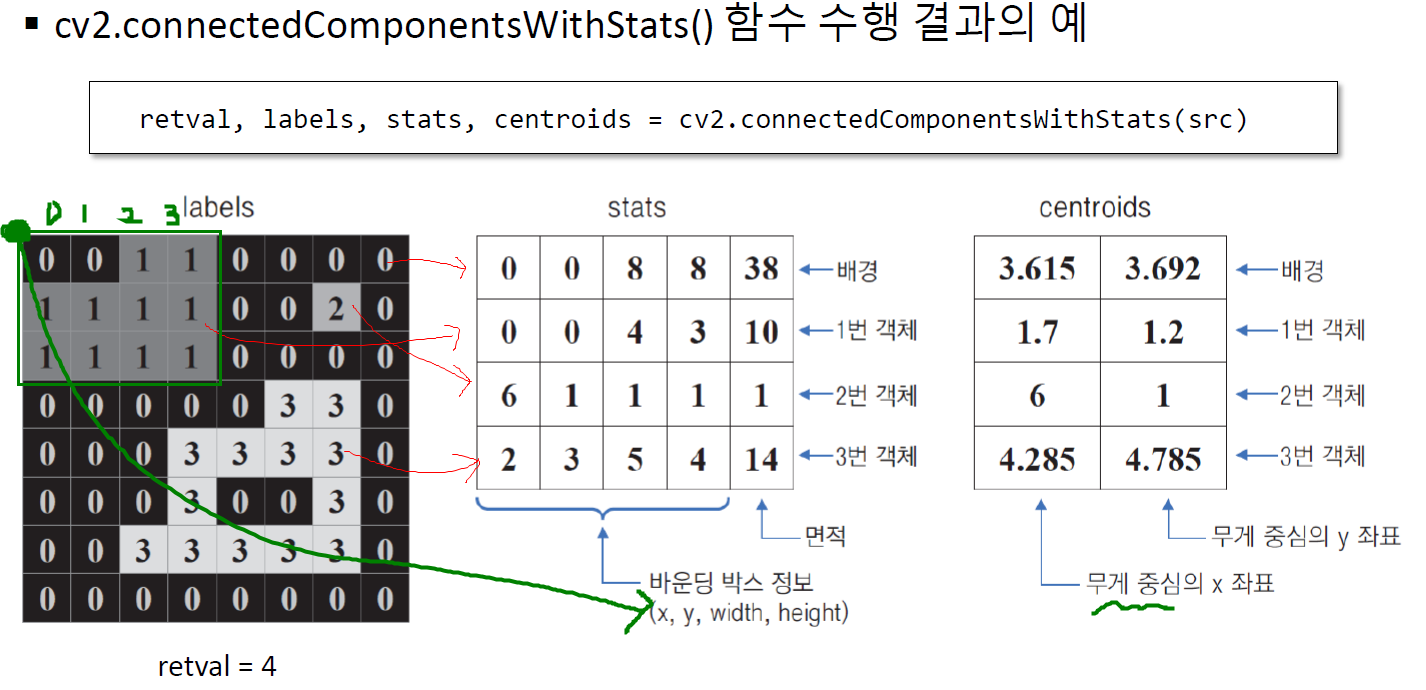
 
**무게중심계산** 
- (첫행) 2 + 3 +(두번째) 0+ 1+ 2+3 + (세번쨰) 0+1+2+3 = 17 , 17/10 = 1.7

In [18]:
import sys
import numpy as np
import cv2


src = cv2.imread('.\\ch07\\keyboard.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()
    
# ostu 이진화 
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_OTSU)

cnt, labels, stats, centroids = cv2.connectedComponentsWithStats(src_bin)

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

# 배경은 필요없으므로 range 함수 1부터 시작
for i in range(1, cnt):
    (x, y, w, h, area) = stats[i]

    if area < 20:
        continue
        # noise 무시하기, 열기,닫기로도 가능하지만 여기서는 면적값 이용
    cv2.rectangle(dst, (x, y, w, h), (0, 255, 255))

cv2.imshow('src', src)
cv2.imshow('src_bin', src_bin)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()


### 외곽선 검출
 - 객체의 외곽선 좌표를 모두 추출하는 작업
 - 계측정 구조도 표현 가능 
 
**``` cv2.findContours(image, mode, method, contours=None, hierarchy=None, offset=None) -> contours, hierarchy```**
 - image : non-zero픽셀을 객체로 간주
 - mode : 검출함수(cv2.RETR_EXTERNAL, cv2.RETR_LIST, cv2.RETR_CCOMP, cv2.RETR_TREE)
 - method : 외곽선 근사화 방법 (cv2.CHAIN_APPROX_NONE,cv2.CHAIN_APPROX_SIMPLE, cv2.CHAIN_APPROX_TC89_L1, cv2.CHAIN_APPROX_TC89_KCOS)  
 - contours: 검출된 외곽선 좌표. numpy.ndarray(np.int32) , shape = (K,1,2) (k= 외곽선 좌표 개수)
 - hierarchy : 외곽선 계층 정보. shape=(1,N,4). dtype=np.int32. hierarchy[0,i,0] ~ hierarchy[0,i,4] 의 순서대로 next, prev, child,parent. 외곽선이 없으면 -1.  
 - offset : 좌표값 이동 옵셋(기본은 (0,0) 
 
|||
|--|--|
|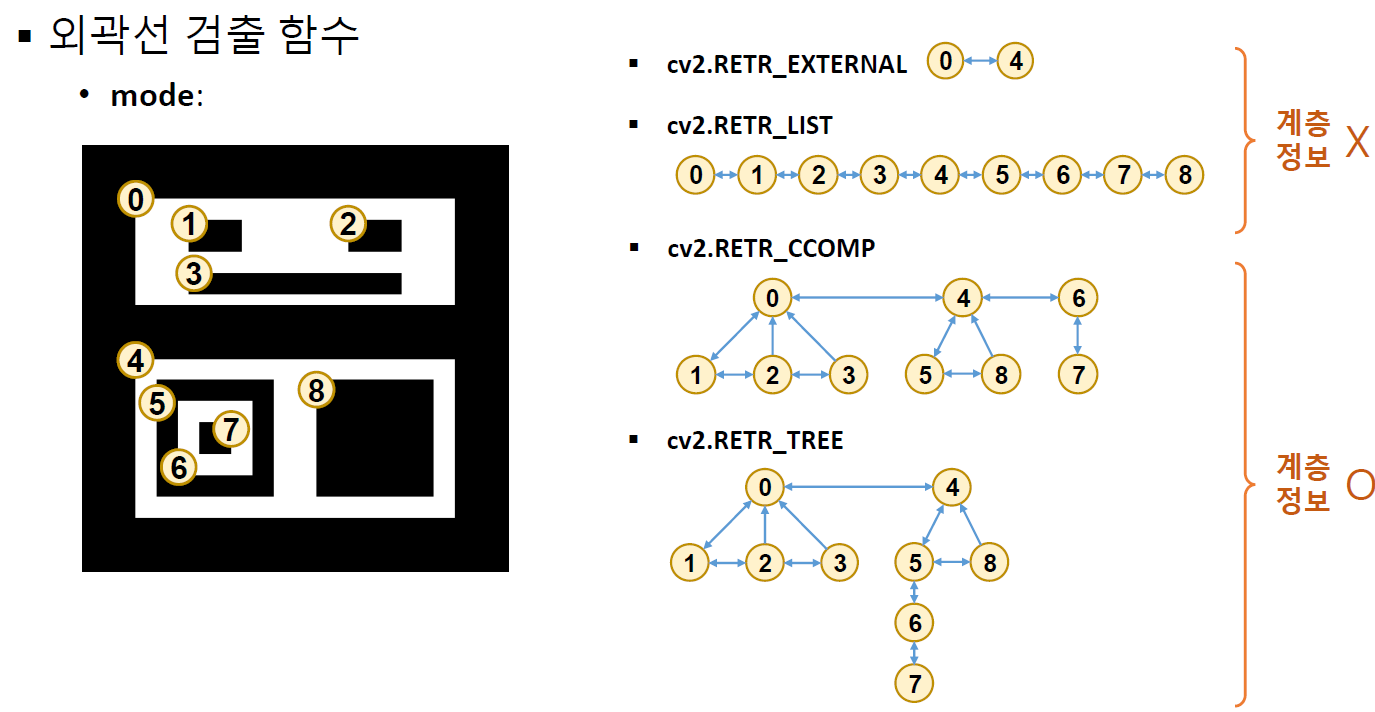|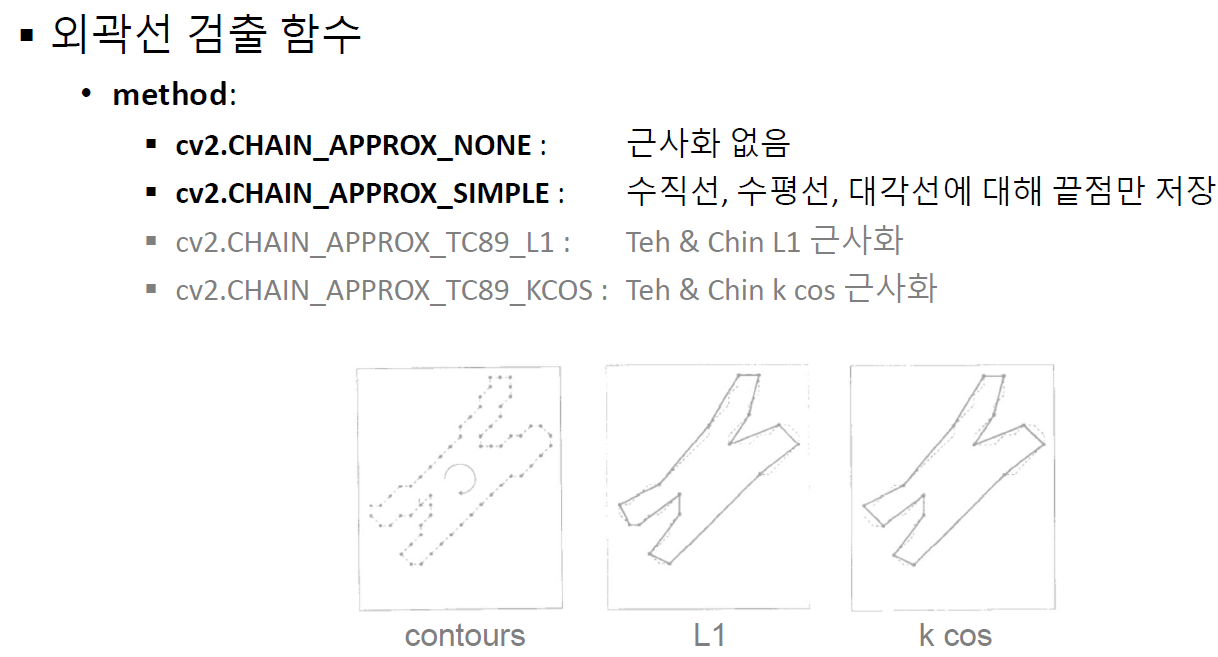|

**``` cv2.drawContours(image, contours, contourIdx, color,thickness=None, lineType=None, hierarchy=None, maxLevel=None,offset=None) -> image```**
 - image : non-zero픽셀을 객체로 간주
 - contours: findContours로 검출된 외곽선 좌표.
 - contoursIdx : 외곽선 인덱스, -1이면 모든 외곽선.  
 - color: color:외곽선 색상
 - thickness: 외곽선 두께. thinkness < 0 이면 내부를 채운다 .
 - lineType : LINE_4, LINE_8, LINE_AA 중 하나 지정
 - hierarchy: 외곽선 계층 정보 .
 - maxLevel : 그리기를 수행할 최대 외곽선 레벨. 0일 경우 contourIdx로 지정된 외곽선만. 


In [21]:
''' 계측정보를 사용하는 외곽선 검출 prac'''
import sys
import random
import numpy as np
import cv2


src = cv2.imread('.\\ch07\\contours.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

contours, hier = cv2.findContours(src, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

idx = 0
while idx >= 0:
    color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    cv2.drawContours(dst, contours, idx, color, 2, cv2.LINE_8, hier) # hier가 없으면 바깥쪽만 그린다 
    idx = hier[0, idx, 0]

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()


In [24]:
''' 계측정보를 사용하지 않는 외곽선 검출 prac'''
import sys
import random
import numpy as np
import cv2


src = cv2.imread('.\\ch07\\milkdrop.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_OTSU)

contours, _ = cv2.findContours(src_bin, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

h, w = src.shape[:2]
dst = np.zeros((h, w, 3), np.uint8)

for i in range(len(contours)):
    c = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    cv2.drawContours(dst, contours, i, c, 1, cv2.LINE_AA)

cv2.imshow('src', src)
cv2.imshow('src_bin', src_bin)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()


|함수 이름|설명|
|--|--|
|cv2.arcLength()|외곽선 길이를 반환|
|cv2.contourAreacontourArea()|외곽선이 감싸는 영역의 면적을 반환|
|cv2.boundingRect()|주어진 점을 감싸는 최소 크기 사각형 (바운딩 박스 ) 반환|
|cv2.minEnclosingCircle |주어진 점을 감싸는 최소 크기 원을 반환|
|cv2.minAreaRect()|주어진 점을 감싸는 최소 크기 회전된 사각형을 반환|
|cv2.minEnclosingTriangle()|주어진 점을 감싸는 최소 크기 삼각형을 반환|
|cv2.approxPolyDP() | 외곽선을 근사화 (단순화) |
|cv2.fitEllipsefit()| 주어진 점에 적합한 타원을 반환|
|cv2.fitLine()|주어진 점에 적합한 직선을 반환|
|cv2.isContourConvex()|컨벡스인지를 검사|
|cv2.convexHul()|주어진 점으로부터 컨벡스 헐을 반환|
|cv2.convexityDefects| 주어진 점과 컨벡스 헐로부터 컨벡스 디펙트를 반환 |

#### 길이 구하기

``` cv2.arcLength(curve, closed)-> retval```
 - curve : 외곽선 좌표. np.ndarrar, shape=(K,1,2)
 - close : True면 폐곡선 
 - retval: 외곽선 길이

#### 면적 구하기
``` cv2.contourArea(contour, oriented=None)-> retval```
 - contour : 외곽선 좌표. np.ndarray, shape=(K,1,2)
 - oriented : True면 외곽선 진행 방향에 따라 부호 있는 면적을 반환  
 - retval: 외곽선으로 고성된 영역의 면적

#### bounding box 구하기  (외접하여 둘러싸는 가장 작은 사각형)
``` cv2.boundingRect(array) -> retval```
 - array : 외곽선 좌표. np.ndarray, shape=(K,1,2)
 - retval: 사각형 정보 (x,y,w,h) tuple

#### bounding circle 구하기
``` cv2.minEnclosingCircle(points) -> center, redius```
 - points : 외곽선 좌표. np.ndarray, shape=(K,1,2)
 - center : 바운딩 서클 중심 좌표(x,y) 
 - radius : 실수형 반지름
 
#### 외곽선 근사화
``` cv2.approxPolyDP(curve, epsilon, close,approxCurve= None) -> approxCurve```
 - curve : 외곽선 좌표. np.ndarray, shape=(K,1,2)
 - epsilon : 근사화 정밀도 조절 , 입력 곡선과 근사화 곡선간의 최대 거리 
 - close : True면 폐곡선 
 - approxCurve : 근사화된 곡선 좌표 

#### convex 검사 (볼록한 부분만 있는 도형)
``` cv2.isContourConvex(contour) -> retval```
 - contour : 입력 곡선 좌표 (k,1,2)
 - retval : convex면 True, 아니면 False
 

### 원 판별하기 
 - 외곽선의 길이(P)의 제곱과 도형의 넓이(A)의 비율이 1/(4pi)에 가까우면 원이다 
 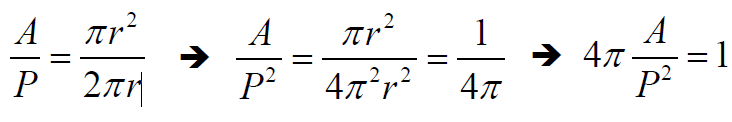
 

In [25]:
import math
import cv2


def setLabel(img, pts, label):
    (x, y, w, h) = cv2.boundingRect(pts)
    pt1 = (x, y)
    pt2 = (x + w, y + h)
    cv2.rectangle(img, pt1, pt2, (0, 0, 255), 1)
    cv2.putText(img, label, pt1, cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255))


def main():
    img = cv2.imread('.\\ch07\\polygon.bmp', cv2.IMREAD_COLOR)

    if img is None:
        print('Image load failed!')
        return

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #도형이 어두워서 INV 사용
    _, img_bin = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
    #최외각만 EXTERNAL
    contours, _ = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    for pts in contours:
        if cv2.contourArea(pts) < 400:  #  너무 작으면 무시 (가로세로 20px 정도)
            continue

        approx = cv2.approxPolyDP(pts, cv2.arcLength(pts, True)*0.02, True) # margin이 0.02 

        vtc = len(approx)

        if vtc == 3:
            setLabel(img, pts, 'TRI')
        elif vtc == 4:
            setLabel(img, pts, 'RECT')
        else: # 원인지 조사 
            length = cv2.arcLength(pts, True)
            area = cv2.contourArea(pts)
            ratio = 4. * math.pi * area / (length * length)

            if ratio > 0.85: #0.75면 타원도 검출
                setLabel(img, pts, 'CIR')

    cv2.imshow('img', img)
    cv2.waitKey()
    cv2.destroyAllWindows()


if __name__ == '__main__':
    main()


## [실전코딩] 명함 인식 프로그램
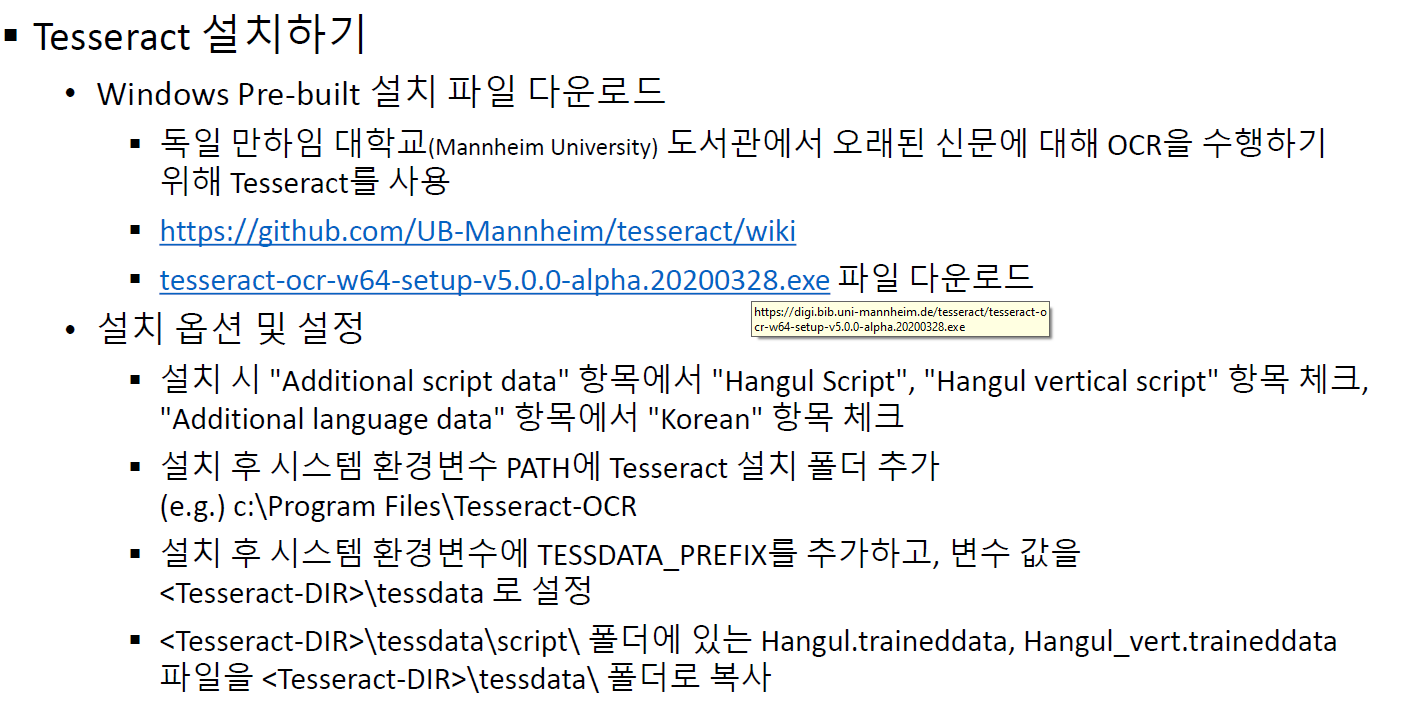

In [ ]:
"""
Tesseract-ocr 설치하기

1. tesseract-ocr-w64-setup-v5.0.0-alpha.20200328 파일 다운로드 
   (https://digi.bib.uni-mannheim.de/tesseract/tesseract-ocr-w64-setup-v5.0.0-alpha.20200328.exe)
2. 설치 시 "Additional script data" 항목에서 "Hangul Script", "Hangul vertical script" 항목 체크,
   "Additional language data" 항목에서 "Korean" 항목 체크.
4. 설치 후 시스템 환경변수 PATH에 Tesseract 설치 폴더 추가
   (e.g.) c:\Program Files\Tesseract-OCR
4. 설치 후 시스템 환경변수에 TESSDATA_PREFIX를 추가하고, 변수 값을 <Tesseract-DIR>\tessdata 로 설정
5. <Tesseract-DIR>\tessdata\script\ 폴더에 있는 Hangul.traineddata, Hangul_vert.traineddata 파일을
   <Tesseract-DIR>\tessdata\ 폴더로 복사
6. 명령 프롬프트 창에서 pip install pytesseract 명령 입력
"""

import sys
import random
import numpy as np
import cv2
# import pytesseract


def reorderPts(pts):
    idx = np.lexsort((pts[:, 1], pts[:, 0]))  # 칼럼0 -> 칼럼1 순으로 정렬한 인덱스를 반환
    pts = pts[idx]  # x좌표로 정렬

    if pts[0, 1] > pts[1, 1]:
        pts[[0, 1]] = pts[[1, 0]]

    if pts[2, 1] < pts[3, 1]:
        pts[[2, 3]] = pts[[3, 2]]

    return pts


# 영상 불러오기
filename = '.\\ch07\\namecard1.jpg'
if len(sys.argv) > 1:
    filename = sys.argv[1]

src = cv2.imread(filename)

if src is None:
    print('Image load failed!')
    sys.exit()

# 출력 영상 설정
dw, dh = 720, 400 # 명함의 9:5 비율대로
srcQuad = np.array([[0, 0], [0, 0], [0, 0], [0, 0]], np.float32)
dstQuad = np.array([[0, 0], [0, dh], [dw, dh], [dw, 0]], np.float32)
dst = np.zeros((dh, dw), np.uint8)

# 입력 영상 전처리
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_, src_bin = cv2.threshold(src_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# 외곽선 검출 및 명함 검출
contours, _ = cv2.findContours(src_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cpy = src.copy()
for pts in contours:
    # 너무 작은 객체는 무시
    if cv2.contourArea(pts) < 1000:
        continue

    # 외곽선 근사화
    approx = cv2.approxPolyDP(pts, cv2.arcLength(pts, True)*0.02, True)

    # 컨벡스가 아니고, 사각형이 아니면 무시
    if not cv2.isContourConvex(approx) or len(approx) != 4:
        continue

    cv2.polylines(cpy, [approx], True, (0, 255, 0), 2, cv2.LINE_AA)
    #좌상 0 , 좌하 1, 우하 2 , 우상 3 으로 만들어주는 수동 code 
    srcQuad = reorderPts(approx.reshape(4, 2).astype(np.float32))

pers = cv2.getPerspectiveTransform(srcQuad, dstQuad)
dst = cv2.warpPerspective(src, pers, (dw, dh))

# dst_gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
# print(pytesseract.image_to_string(dst_gray, lang='Hangul+eng'))

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()
